In [54]:
# import packages

In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Part 1 ‑ Exploratory data analysis

##  import dataset 

#### The dataset of logins

It contains (simulated) timestamps of user logins in a particular geographic location. 

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [56]:
df_login = pd.read_json(r'D:\Springboard\Github\ultimate_challenge_analysis\logins.json')

In [57]:
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [58]:
df_login.shape

(93142, 1)

In [59]:
df_login['denote']=1

In [60]:
df_login

,login_time,denote
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


In [61]:
# check the data type of each columns 
df_login.dtypes

login_time    datetime64[ns]
denote                 int64
dtype: object

In [62]:
df_login

,login_time,denote
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


In [63]:
#  Aggregate these login counts based on 15minute time intervals
# question: how could I plot that it is to show which time period would be the most busy time in one day?
# if we could understand when the most busiest time are, then improve the service quality 
login_seq = df_login.resample('15T',on='login_time').denote.sum().sort_values(ascending=False)
login_seq.head(30)

login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 05:15:00    59
1970-04-04 04:45:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
1970-04-04 01:00:00    54
1970-03-17 01:30:00    53
1970-04-04 00:30:00    53
1970-03-29 04:45:00    52
1970-03-08 04:45:00    51
1970-04-03 22:45:00    50
1970-03-29 02:15:00    50
1970-04-04 00:45:00    50
1970-02-15 04:45:00    50
1970-03-28 04:30:00    50
1970-03-01 04:45:00    48
1970-04-04 03:00:00    47
1970-03-07 03:00:00    47
1970-03-08 05:00:00    47
1970-04-03 23:15:00    47
1970-03-07 04:45:00    46
1970-04-04 03:15:00    46
1970-02-07 04:30:00    46
1970-03-22 04:00:00    46
1970-03-22 01:30:00    46
Name: denote, dtype: int64

<AxesSubplot:xlabel='login_time'>

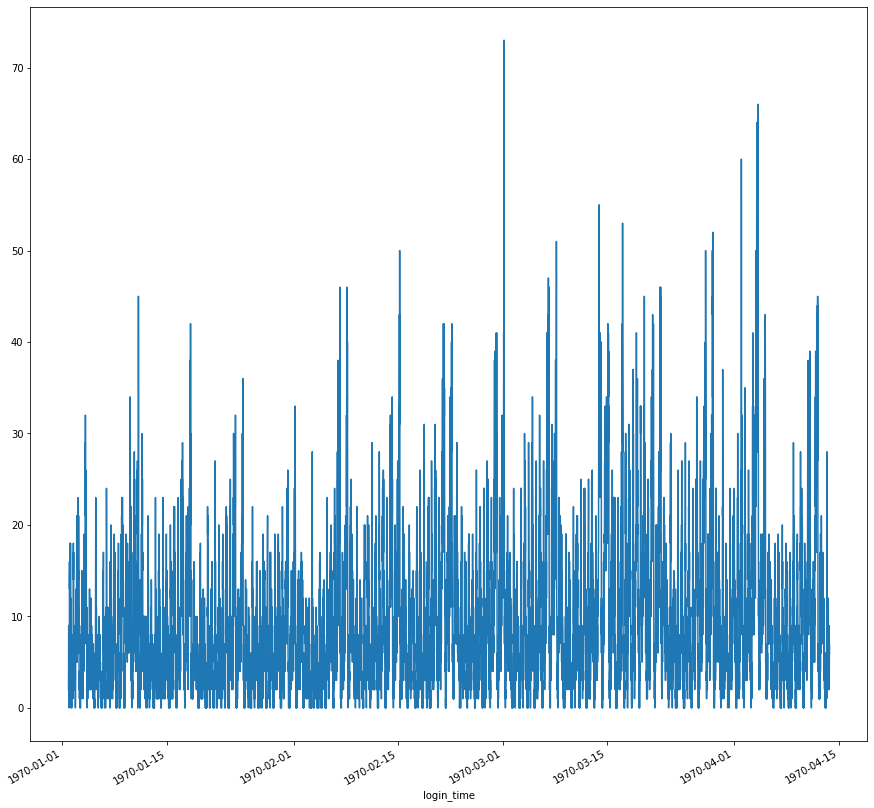

In [64]:
# Finding: From above result, we understand that the most frequent login 15 mins could reach to 73
    
login_seq.plot(figsize=(15,15))

####  Try to understand that which hour is the most busest hour in one day. 

In [65]:
df_login['hour'] = df_login['login_time'].dt.hour

<AxesSubplot:xlabel='hour', ylabel='denote'>

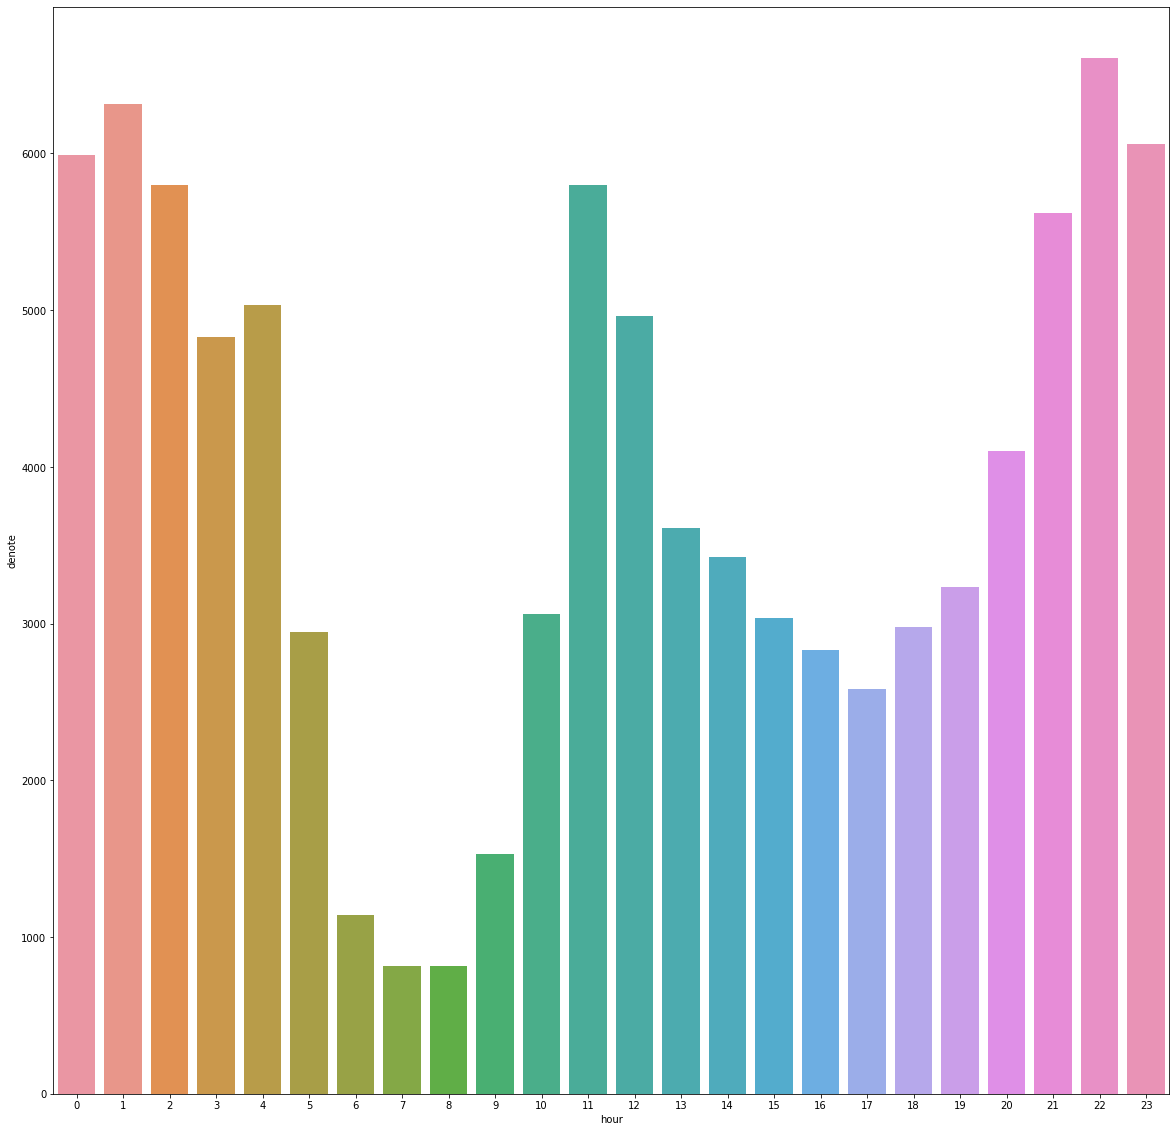

In [66]:
# group by the login hours of a day
df_hour = df_login[['denote', 'hour']]
df_hour = df_hour.groupby('hour').sum().reset_index()

#barplot of logins by hour 
plt.figure(figsize=(20,20))
sns.barplot(x='hour', y='denote', data=df_hour)

#####  Finding: There are two peaks within a day. One is around midnight and another peak is at 11am， therefore, there are two busy periods for the company in one day. 

# Part 2 ‑ Experiment and metrics design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A:  How many the frequency of travelling bewteen two cities has been increased?
Or the cancellation rate between two cities travel

Below two answers are not direct and clear.
/ The reimbursing toll costs divided by the toll cost per time. 
/ How many revenue has been increased after implement this experiment 


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment
Conduct the A/B test for two groups for the drivers. One group of drivers would receive benefits of reimbursing all toll costs.Another group would not receive the benefits. 

1. Hypothesis 
   - Null hypothesis: There is no different about travel frequency between two groups
   - Alternate hypothesis: There is different about travel frequency between two groups
2. Implement
   - Tracking the pickup location and dropoff location between two cities and calcuate the frequcny.
   - Run Experiment & Monitor & Collect data
3. Measurement
   - Result measurement
   - Data Analysis
   - Decision Making

b. what statistical test(s) you will conduct to verify the significance of the observation
Answer: T-test 


c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
1. if the profit after implement the experiment has been increased, then it is worthwhile to apply reimbursement policy between two cities travelling. Or even profit equals to before experiment, however, the customer satisfacation/ rating has been increased, it should  applied it too. 



# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

#### Users Sample dataset

It is a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## import the dataset 

In [67]:
df = pd.read_json(r'D:\Springboard\Github\ultimate_challenge_analysis\ultimate_data_challenge.json')

In [68]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [69]:
# drop the rows with missing value

df = df.dropna(axis=0)

In [70]:
# Convert "city" column to be different columns for each city category
city_columns = pd.get_dummies(df['city'],prefix='city')
df = pd.concat([df,city_columns], axis=1)
df= df.drop('city',axis=1)

In [71]:
phone_columns = pd.get_dummies(df['phone'],prefix='phone')
df = pd.concat([df, phone_columns], axis=1)
df = df.drop('phone',axis =1)

In [72]:
# Convert from true/false to 1/0 
df['ultimate_black_user'] = [1 if x[1]==True else 0 for x in df['ultimate_black_user'].iteritems()]
df['ultimate_black_user'].value_counts()

0    25526
1    15919
Name: ultimate_black_user, dtype: int64

In [73]:
# check the data type of 'signup_date' and understand it is string format in the dataset 
df['signup_date'].dtypes

dtype('O')

In [74]:
# Convert signup_date column to be an integer of seconds since the first user signed up 
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_date'] = (df['signup_date'] - min(df['signup_date'])).dt.total_seconds()

- Definition of rider retention: a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [75]:
# Get the lastest date of the 'last_trip_date'. 
df['last_trip_date'].max()

'2014-07-01'

In [76]:
# make retained column
# Rider is retained if they have ridden in the last month, which means they should drive at least one time after '2014-06-01'

df['retained'] = np.where(df['last_trip_date']>='2014-06-01', 1,0)

In [77]:
df['retained'].value_counts()

0    24410
1    17035
Name: retained, dtype: int64

# Modelling 

In [78]:
# import sklearn functions
import matplotlib.pyplot as plt 
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime 

## Preprocessing the dataset

In [79]:
df

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,retained
0,4,2073600.0,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,0,1,1
1,0,2419200.0,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0
2,3,432000.0,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,1,0,0,0,1,0
3,9,777600.0,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,0,1,1
4,14,2246400.0,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,3,172800.0,4.8,1.11,2014-07-01,11.1,1,55.6,2.53,4.7,1,0,0,0,1,1
49994,1,172800.0,4.6,1.44,2014-05-31,37.5,0,25.0,2.25,4.5,1,0,0,0,1,0
49995,0,2073600.0,5.0,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,0,1,1
49997,0,2592000.0,5.0,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,0,0,1,1,0,0


In [80]:
# Define the predicted variables and target varible

X = df.drop(['last_trip_date','retained'], axis=1)
y = df[['retained']]

In [81]:
# Split data into testing dataset and training dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [82]:
X_test.shape, y_test.shape

((12434, 14), (12434, 1))

## Build Machine Learning Model

In [83]:
# Define an empty dictionary to store all the model 
model_list = {}

### Logistic Regression Model

In the model, target variable is categorical, so it is reasonable to build the logistic regression model to see the performance of this simple model, because it is a basic linear classifier (good to baseline).

In [84]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid, cv=3,scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train, y_train)
model_list['logit_model'] = logit_model

{'C': 0.01}


### Random Forest Model

It is an ensemble bagging classifier, which consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [85]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)
model_list['rf_model'] = rf_model

{'max_depth': 8, 'n_estimators': 300}


### Xgboost

It is an ensemble (extreme!) boosting classifier

In [86]:
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
para_grid = {"learning_rate":[0.01, 0.1,0.5],"n_estimators":[100,300,500], 'max_depth':[3,4,5]}
grid = GridSearchCV(XGBClassifier(),param_grid, cv=3, scoring="roc_auc")
grid.fit(X_train, y_train)
print("best parameters  through grid search:", grid.best_params_)
xgb_model = XGBClassifier(**grid.best_params_)
xgb_model.fit(X_train,y_train)
model_list['xgb_model'] = xgb_model

[07:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[07:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### SVM Model 

Support Vector Machine is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text

In [89]:
from sklearn import preprocessing 

#normalized the data attributes
normalized_X = preprocessing.normalize(X)

normalized_X.shape

(41445, 14)

In [88]:
X_train_nor, X_test_nor, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state= 42)

In [91]:
X_train_nor.shape, y_train.shape

((29011, 14), (29011, 1))

In [108]:
%%time
from sklearn import svm
from sklearn.svm import SVC
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01]}
grid = GridSearchCV(SVC(probability=True), param_grid, cv =3,refit=True, verbose=2)
grid.fit(X_train_nor,y_train)
print("best hypterparameters through grid search:",grid.best_params_)
svm_model = SVC(**grid.best_params_,probability=True)
svm_model.fit(X_train_nor, y_train)
model_list['svm_model'] = svm_model

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.6min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.4min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 1.2min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total= 1.0min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total= 1.0min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 29.4min finished


best hypterparameters through grid search: {'C': 10, 'gamma': 1}
Wall time: 33min 12s


## Model Comparison

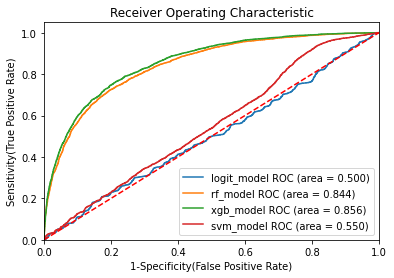

In [109]:
# From below plot, we understand that the performance of XGBoost model is best and 
#logistic model's performance is worst 


from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
    if name == 'svm_model':
        a = X_test_nor
        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
        
    else: 
        a = X_test
# Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [110]:
# From below result, we understand that there is no overfit among all models
auc = pd.DataFrame()
for name, model in model_list.items():
    if name == 'svm_model':
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train_nor)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_nor)[:,1])  
    else:
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    auc.at[name, "train_auc"] = '{0:.2f}'.format(train_auc)
    auc.at[name, "test_auc"] = '{0:.2f}'.format(test_auc)

auc

,train_auc,test_auc
logit_model,0.51,0.50
rf_model,0.86,0.84
xgb_model,0.87,0.86
svm_model,0.55,0.55


In [112]:
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

for name, model in model_list.items():
    if name == 'svm_model':
        clf = model.fit(X_train_nor, y_train)
        y_pred = clf.predict(X_test_nor)
        print(name)
        print(classification_report(y_test, y_pred))
    else:
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))

logit_model
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      7293
           1       0.00      0.00      0.00      5141

    accuracy                           0.59     12434
   macro avg       0.29      0.50      0.37     12434
weighted avg       0.34      0.59      0.43     12434

rf_model
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      7293
           1       0.75      0.67      0.71      5141

    accuracy                           0.77     12434
   macro avg       0.77      0.76      0.76     12434
weighted avg       0.77      0.77      0.77     12434

[10:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb_model
     

## Feature Importance

### For random forest model and XGBoost model 

In [114]:
def feature(name, model, X_train):
    series = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns))
    series.sort_values(ascending=False)[:25].plot(kind='bar',figsize=(10,10))
    plt.xticks(rotation = 60,ha = 'right')
    plt.title("Feature Importance of "+name, fontsize=15)
    plt.show()

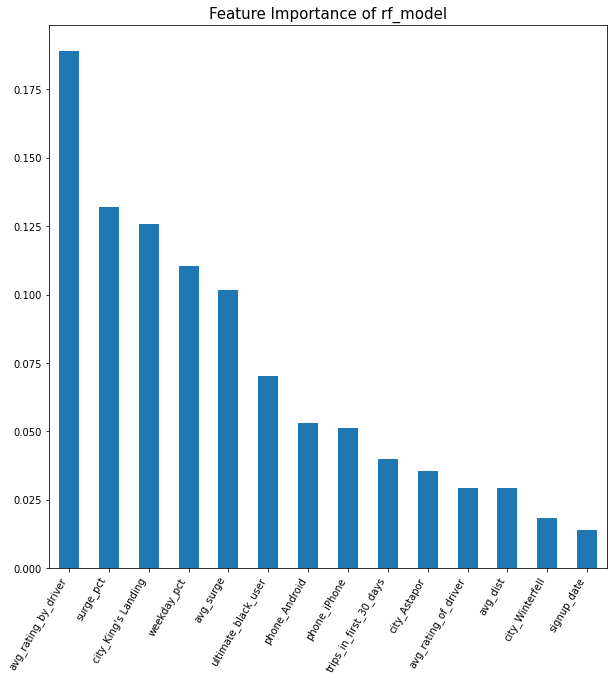

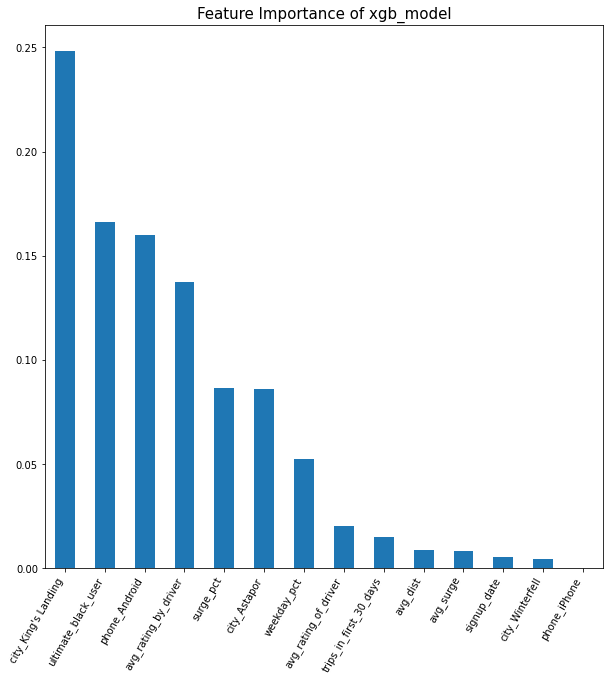

In [115]:
for name, model in model_list.items():
    if name == 'xgb_model' or name =='rf_model':
        feature(name, model, X_train)

#####  Conclusion: 
- For random forest model, 'avg_rating_by_driver','surge_pct' and 'city_King's Landing' are the top three most important variables in the model
- For XGBoost model, 'city_King's Landing','ultimate_black_user','phone_Android' are the top three most important variables in the model.


### Logistic Model's feature selection 

In [116]:
from scipy.stats import norm

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return coefs, p

In [117]:
coefs, p = logit_pvalue(logit_model, X_train)
X_cols_inc = X.columns.tolist()
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value 

,feature,coeffienct,P_value
0,Intercept,-2.783521e-13,NaN
1,trips_in_first_30_days,3.016037e-12,1.0
2,signup_date,-2.219153e-07,0.0
3,avg_rating_of_driver,-1.307499e-12,1.0
4,avg_surge,-3.048258e-13,1.0
5,surge_pct,-1.406564e-12,1.0
6,ultimate_black_user,3.615145e-13,1.0
7,weekday_pct,-1.614559e-11,1.0
8,avg_dist,-3.673356e-12,1.0
9,avg_rating_by_driver,-1.386631e-12,1.0


In [118]:
p_value.sort_values(by=['P_value'])

,feature,coeffienct,P_value
2,signup_date,-2.219153e-07,0.0
1,trips_in_first_30_days,3.016037e-12,1.0
3,avg_rating_of_driver,-1.307499e-12,1.0
4,avg_surge,-3.048258e-13,1.0
5,surge_pct,-1.406564e-12,1.0
6,ultimate_black_user,3.615145e-13,1.0
7,weekday_pct,-1.614559e-11,1.0
8,avg_dist,-3.673356e-12,1.0
9,avg_rating_by_driver,-1.386631e-12,1.0
0,Intercept,-2.783521e-13,NaN
